# Modelant el canvi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import Math, display
sp.init_printing()
n = 50

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

- Amb l'anàlisi del sistema vam identificar un seguit de factors
- Vam fer assumpcions de quins factors serien rellevants
- Amb aquest conjunt de factors identificats comencem la modelització
- És important prendre nota de les assumpcions que anem fent durant el procés de simulació per poder revisar-les a posteriori

- Entre les nostres assumpcions tindrem variables dependents d'altres variables independents
- Analitzant la relació entre variables dependents i independents podem formular matemàticament la seva relació
    - Estem modelitzant el seu comportament

- El canvi pot ser discret o continu
- Pot ser constant, proporcional a alguna variable o tindre un comportament característic
- Podem modelar-lo amb equacions de diferències o diferencials

- És convenient observar el comportament de les variables a valors extrems, la seva evolució i derivades
- Observar si hi ha zeros, asímptotes i cicles
- Hi ha més comportaments a banda dels que anem a estudiar a continuació

### Creixement constant
- La variable independent fa créixer (o decréixer) linealment la variable depenent

- $f(x) = f_0 + a x \qquad f(x)' \propto cte$
- Per $x=0$ val $f_0$

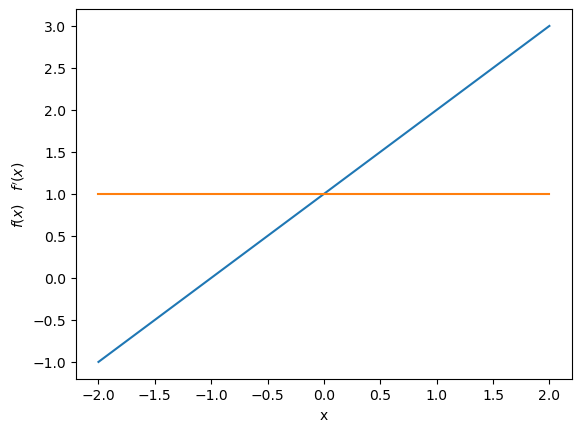

In [2]:
X = np.linspace(-2, 2, n)
Y1 = 1 + X
Y2 = np.ones(n)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

### Creixement exponencial
- Quan el ritme de canvi d'una variable depèn del valor de la mateixa variable ens trobarem amb comportaments exponencials
- Molts fenòmens tenen un creixement o decaïment exponencial en el temps
- Altres decauen amb la distància o amb altres variables
- És un comportament que tendeix a infinit i pot semblar absurd
    - Però pot ser vàlid dins dels límits (context) del nostre model.

- $f(x) = f_0 \,e^{a x} \qquad f(x)' \propto f(x)$
- És positiva i per $x=0$ val $f_0$

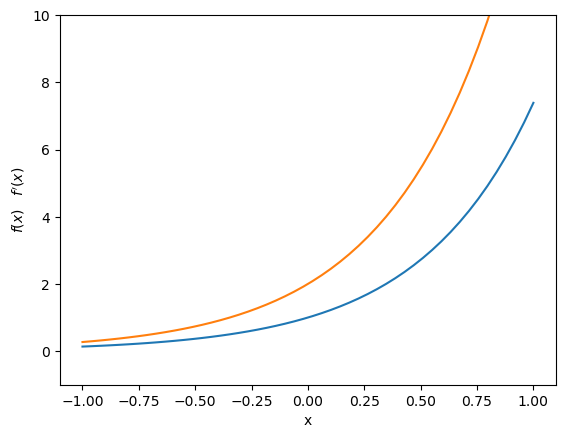

In [3]:
X = np.linspace(-1, 1, n)
Y1 = np.exp(2 * X)
Y2 = 2 * np.exp(2 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 10])
plt.show()

### Exemple: Cultiu de bacteris
- Tenim un cultiu de 100 organismes idèntics
- Quants individus hi tindrem d'ací a una hora? 
- Com modelitzem aquest comportament?

- Assumim que:
    - Ritme de reproducció per individu és constant
    - La vida dels individus molt llarga
    - No interactuen
    - No estan limitats pels recursos

- Caracteritzem el canvi:
$$
\begin{align}
P_{n+1} & = P_n + \Delta P \\
\Delta P & = P_{n+1} - P_n \\
\Delta P & = 8 * P_n \\
\end{align}
$$

- En forma diferencial seria de la forma:
$$P'(t)=aP(t)$$
- Si resolem, tindrà un comportament exponencial
$$
\begin{align}
P(t) & = P_0 \,e^{a t} \\
P'(t) & = a \,P_0 \,e^{a t} = a \, P(t) \\
\end{align}
$$

Nota: Podríem tindre una població intoxicada amb una taxa de morts elevada i tindre una evolució purament de morts

- La taxa de creixement és proporcional a la pròpia funció

### Decreixement exponencial
- La taxa de decreixement de la variable és proporcional a la mateixa variable
- Comportament asimptòtic
- Podem definir una vida mitjana com el temps què triga la variable a reduir-se a la meitat

- $f(x) = f_0 \,e^{-a x} \qquad f(x)' \propto -f(x)$
- És positiva i per $x=0$ val $f_0$

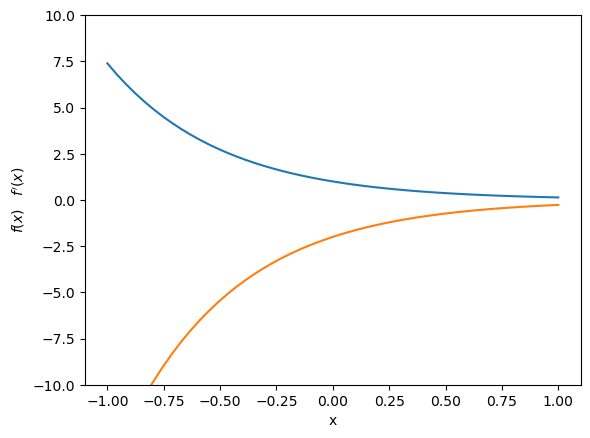

In [4]:
X = np.linspace(-1, 1, n)
Y1 = np.exp(-2 * X)
Y2 = -2 * Y1

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-10, 10])
plt.show()

### Combinació de l'expressió matemàtica
- Hem d'anar amb compte com combinem els comportaments per construir el model
- Podem sumar funcions quan els efectes s'apilen
- Podem multiplicar-los quan un comportament modula a un altre
- En alguns casos també ens pot interessar compondre o convolucionar funcions

### Creixement limitat
- $f(x) = f_\infty (1 - \,e^{-a x}) \qquad f(x)' \propto -f(x)$
- Per $x$ grans tendeix a $f_\infty$

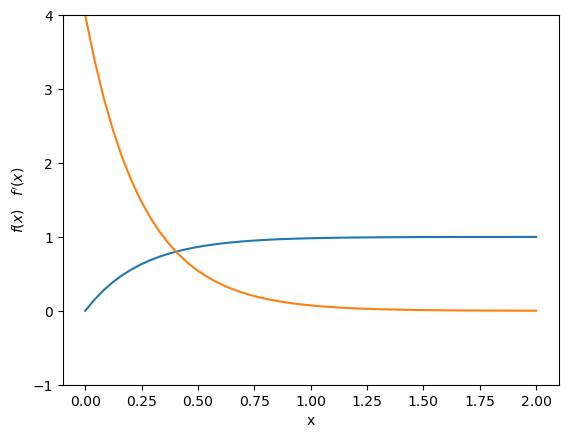

In [5]:
X = np.linspace(0, 2, n)
Y1 = (1 - np.exp(-4 * X))
Y2 = 4 * (1 - Y1) 

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

- Té un creixement asimptòtic fins a un màxim
- Es construeix restant un decreixement logarítmic del valor constant final

### Creixement asimptòtic
- $f(x) = a + b x + c e^{-d x} \qquad f(x)' \propto f(x) - x$
- Per $x$ grans tendeix a la recta $a + bx$

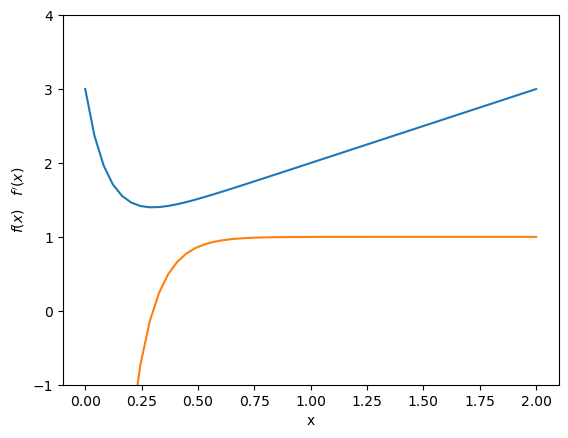

In [6]:
X = np.linspace(0, 2, n)
Y1 = 1 + X + 2 * np.exp(-10 * X)
Y2 = 1 - 20 * np.exp(-10 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

- Té un creixement asimptòtic a la recta
- Es construeix afegint un decreixement logarítmic a una recta

### Màxim amb cua
- $f(x) = a x \,e^{-x/b} \qquad f(x)' = f(x) (1/x - 1/b)$
- És 0 a l'origen, per $x = b$ té el màxim $ab/e$, decreix asimptòticament a 0

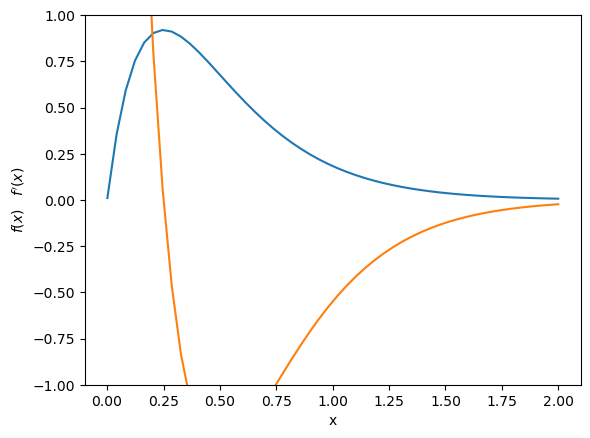

In [7]:
X = np.linspace(0.001, 2, n)
Y1 = 10 * X * np.exp(-4 * X)
Y2 = Y1 * ( 1 / X - 4)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 1])
plt.show()

- Es construeix multiplicant una recta al decreixement logarítmic

### Oscil·lació esmorteïda
- $f(x) = a \,e^{-x/b} \sin(\omega x) \qquad f(x)' = a \,e^{-x/b} (w*\cos(\omega x) - b\sin(\omega x))$
- És 0 a l'origen i a $x = n \pi / \omega$ per $n \in \mathbb{N}$
- Per $x$ grans l'amplitud tendeix a 0

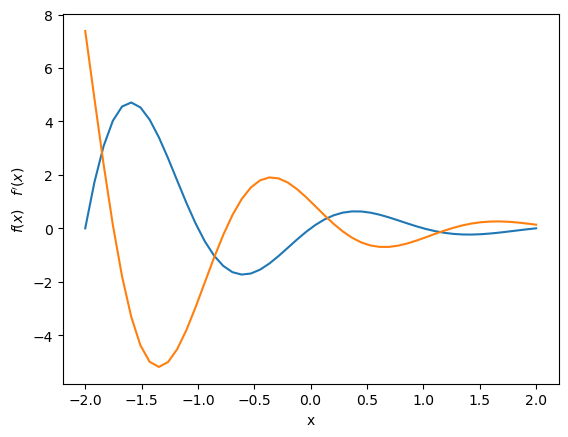

In [8]:
X = np.linspace(-2, 2, n)
Y1 = np.exp(-X) * np.sin(np.pi * X)
Y2 = np.exp(-X) * (np.cos(np.pi * X) - np.sin(np.pi * X))

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

- Es construeix multiplicant un decreixement logarítmic a una oscil·lació
- Sol representar un procés ressonant esmorteït

### Construint funcions matemàtiques
- Hi ha comportaments que podem modelar de forma determinista
- Altres ens interessa representar distribucions de probabilitat per fer estimacions
$$ \int_0^X df(x) dx = f_X - f_0$$

- Exemple d'afluència de clients, esdeveniments naturals o control de qualitat.

- Molts cops ens interessarà representar el comportament en forma diferencial
- La representació gràfica del comportament ens pot donar idees sobre la forma diferencial

- També podem modelar el comportament amb equacions per parts 

- per les diferents fases d'un procés, per exemple.

### Exemple: Obertura d'un local comercial
- Obrim un nou local comercial, de 10 a 12h
- Esperem 500 clients en total, molts estaran esperant a les portes
- Quin ritme d'admissió de clients tindrem?

- Podem modelitzar un creixement lineal en el 15 primers minuts
- Que el 60% arribarà en la primera hora
$$Q'(t) =\begin{cases} a t & 10:00 < t < 10:15 \\
                    b      & 10:15 < t < 11:00 \\
                    b - ct & 11:00 < t < 12:00 \\
       \end{cases}$$

$$ \int_{10h}^{22h} dQ(t) dt = 500$$

$a \cdot 0.25 = b$

$b - c \cdot 1= 0 $

$b \cdot 0.25 / 2 + b \cdot 0.75 + b / 2 = 500$

$a = 1454 \qquad b = 363.6 \qquad c = 363.6$

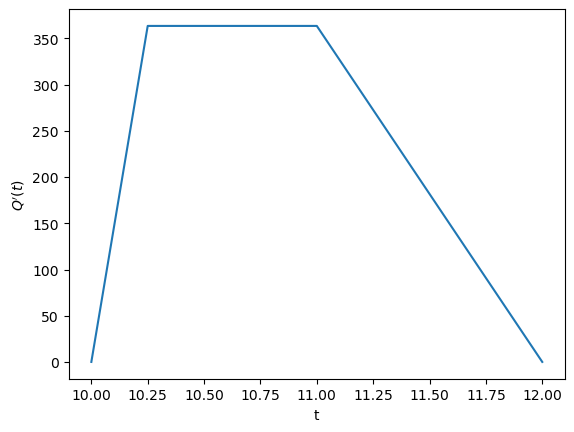

In [9]:
X = [10, 10.25, 11, 12]
Y = [0, 363.6, 363.6, 0]

fig, ax = plt.subplots()

ax.plot(X, Y)
ax.set_ylabel('$Q\'(t)$')
ax.set_xlabel('t')
plt.show()

- També podem modelitzar combinant un creixement lineal al principi i un decaïment exponencial cap al final

$$ Q'(t) = a t \,e^{-t/b} $$

In [10]:
from sympy.abc import a, b, t

Qp = a * (t - 10) * sp.exp(-(t - 10) / b)
Qp1 = sp.integrate(Qp, (t, 10, 11))
Qp2 = sp.integrate(Qp, (t, 10, 12))
#show(Qp1, qq, Qp2)
A, B = map(float, sp.nsolve([Qp1 - 300, Qp2 - 500], (a, b), (100, 1)))

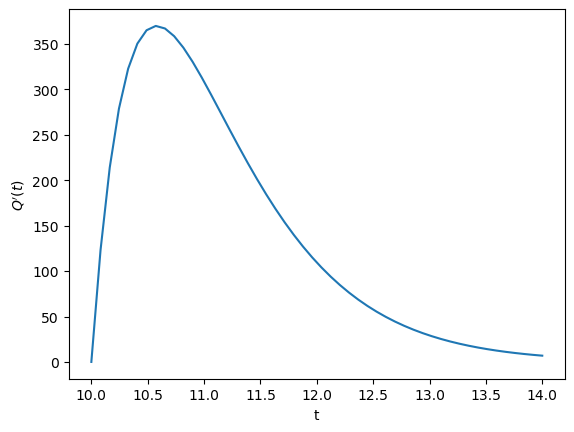

In [11]:
import numpy as np
X = np.linspace(10, 14, n)
Y = A * (X - 10) * np.exp(- (X - 10) / B)

fig, ax = plt.subplots()

ax.plot(X, Y)
ax.set_ylabel('$Q\'(t)$')
ax.set_xlabel('t')
#ax.set_ylim([-1, 1])
plt.show()

### Exemple: Creixement logístic
- Teniu un cultiu de 100 organismes idèntics
- Assumim que:
    - La vida dels individus molt llarga
    - No interactuen
- Aquest cop assumirem que SI estan limitats pels recursos
    - Ritme de reproducció per individu depèn de la població.

- La taxa de creixement per capita, decreixerà segons augmenta la població.

$$\frac{P'}{P} = (r - sP)$$

- Si definim $M$ com la població màxima, tindrem una taxa $\frac{M-P}{M}$

$$𝑃′(𝑡)=𝑎𝑃(𝑡)\frac{M-P(t)}{M}$$

- És el que anomenem un comportament logístic o equació Verhulst-Pearl 

- Podem optar per resoldre l'equació diferencial $𝑃′(𝑡)=aP\frac{M-P}{M}$
$$
\begin{align}
\int \frac{M}{P(M-P)}\,dP = \int \frac{1}{P} + \frac{1}{(M-P)}\,dP & = \int a\, dt \\
\log P -\log (M-P) & = at +C \\
\log \frac{P}{M-P} & = at + C \\
\end{align}
$$

$$
\begin{align}
\frac{P}{M-P} & = e^{at+c} \\
P (1 + e^{at+c}) & = M e^{at+c} \\
P = M \frac{e^{at+c}}{1 + e^{at+c}} & = \frac{M}{1 + e^{d-at}} \\
\end{align}
$$

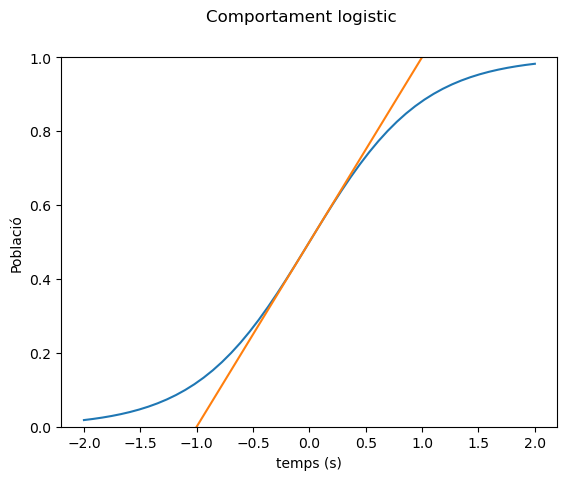

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2, 2, 50)
Y1 = 1 / (1 + np.exp(-2 * X))
Y2 = 0.5 + X / 2

fig, ax = plt.subplots()
fig.suptitle('Comportament logistic')

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 1])

plt.show()

# Bibliografia

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Olinick'></a> Olinick, M., **2014**. Mathematical Modeling in the Social and Life Sciences. WILEY.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg